# SVM Lab
在本Lab中，你将学会训练并使用一个SVM分类器来对数据进行分类。在完成本Lab后，你将会对SVM的dual form以及其训练算法有一个更深入的理解。请按顺序依次完成以下任务。


## 准备工作

### 环境准备

请确保完成以下依赖包的安装，并且通过下面代码来导入与验证。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm


np.random.seed(0)

### 数据集准备

我们将使用以下zipper数据集来训练SVM分类器，并观察训练效果。

该数据集包含两个特征，以及一个标签y，其外观像是一个拉链。我们将使用SVM分类器来对数据集进行分类，预测两种类别中间的三角函数分界线。

请运行下面的代码来加载并可视化zipper dataset。

In [3]:
from dataset_generator import zipper_2D_dataset

n_pos = 100
n_neg = 100

x_train, y_train = zipper_2D_dataset(n_pos, n_neg, scope=4.0)
x_test, y_test = zipper_2D_dataset(50, 50, scope=5.5) # Test data is slightly out-of-distribution

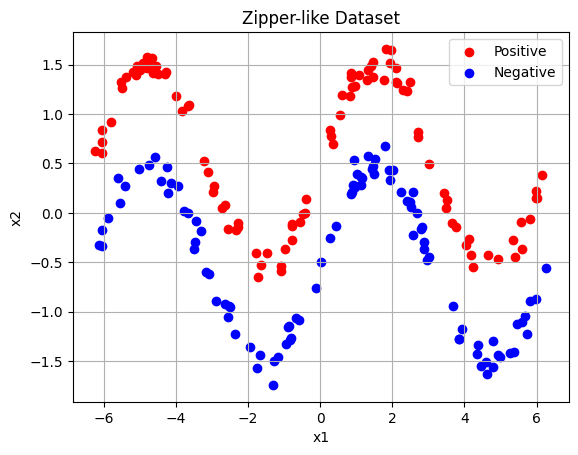

In [4]:
from vis_utils import visualize_2D_dataset

visualize_2D_dataset(x_train, y_train)

## Part 1: Support Vector Machine (10 pts)

在本部分，你将学习并完成SVM dual form的编写与训练。

在运行该部分代码前，请首先：

1. **补全kernels.py中三个kernel的代码；** (请首先阅读Base_kernel类的注释)

2. **补全SVM.py中SVM的predict函数；**

In [5]:
from SVM import SVM
from kernels import Linear_kernel, Polynomial_kernel, RBF_kernel

kernel_fn = Linear_kernel()
svm = SVM(kernel_fn=kernel_fn)

## Part 2: Simplified SMO (10 pts)

为了对SVM进行训练，我们需要对以下目标函数进行优化：




\begin{aligned}
 \max_{\alpha}&\ \  W(\alpha) = \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j \kappa ( x^{(i)}, x^{(j)})  \\
 \text{subject to}& \ \ 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, m \\
&\ \ \sum_{i=1}^{m} \alpha_i y^{(i)} = 0
\end{aligned}


一种常用的优化SVM的算法叫做SMO，全称是序列最小优化(Sequential Minimal Optimization)。它是由Platt于1998年提出的，用于高效地解决上述的二次规划问题。

SMO采取的策略是：多次迭代优化，每一次优化时仅优化两个变量，而固定其他变量。选择两个变量的原因是因为我们有一个线性的等式约束，这使得给定一个变量，另一个变量就可以由它确定。这样，问题就简化为本质上只有一个变量的优化问题，它可以通过解析方法得到解决。

SMO算法的工作流程如下：

1. 采用heuristic选择两个待优化的变量：一种常见的方法是选择违反KKT条件最严重的变量作为第一个变量，进一步选择使得目标函数值改变最大的变量作为第二个变量。

2. 固定其他变量，对这两个变量通过解析方法进行优化。（本质上是一个2 order polynomial的优化问题）

3. 检查是否所有变量都满足KKT条件：如果满足，则算法停止；否则，返回到第一步。

在实际应用中，SMO算法通过反复地选择和优化两个变量，直到整个数据集都满足KKT条件或满足一定的停止标准。由于每次都是解决一个简化的问题，SMO算法通常可以很快地收敛到最优解。



在本部分，我们将编写一种**简化版的SMO算法**，称为Simplified SMO。其简化之处主要在于上述工作流程中的第一步，即如何选取这两个待优化的变量上。在Simplified SMO中，我们采用的策略是：

1. 首先遍历所有的变量，直到找到第一个违反KKT条件的变量 $\alpha_i$，将其作为第一个待优化的变量；

2. 从所有其他变量中随机选择一个变量 $\alpha_j$ 作为第二个待优化的变量。

3. 在完成针对于这两个变量的优化后，从 $\alpha_i$ 开始继续遍历。若 $\alpha_i$ 已是最后一个变量，则从第一个变量开始重新遍历。

相比于SMO，Simplified SMO无法保证总是能优化到全局最优点，因为其无法保证对每一对变量都进行优化。然而，其能保证在绝大多数情况下均能收敛到不错的解。（注意，由于你每一次都是在做优化，因此你的objective function值应该总是在不断变小的。）

**请你来补全SSMO.py中SSMO_optimizer.fit中的循环代码。**

注意：

1. judge_violoate_KKT(), compute_E(), compute_eta(), compute_new_aj() when eta < 0, compute_b(), update_SVM()等已给出，你可以直接调用，请首先完成这些函数及其注释的阅读。

2. **compute_L_H(), compute_new_aj() when eta > 0, compute_new_ai 三个函数的代码未给出，需要你根据TODO处的要求来补全。**



采用Simplified SMO算法，我们可以对SVM进行训练。请运行下面的代码进行训练。若你的代码正确，你将会看到每一个pass的loss均在单调下降。

In [6]:
from SSMO import SSMO_optimizer
C = 1.0
max_passes = 1000

optimizer = SSMO_optimizer(C=C)
optimizer.fit(svm, x_train, y_train, max_passes=max_passes, verbose=True)

Start training using SMO


loss: -113.2368: : 1000it [00:05, 199.76it/s]

Training finished


训练完成后，我们可以利用训练得到的分类器来进行预测。请编写代码，计算训练集、测试集中的预测准确率。

In [7]:
# TODO: Implement the code to compute the accuracy of svm in the test set. 
# Note that svm itself is already trained, if you have run the above code.
_, y_train_pred = svm.predict(x_train)
_, y_test_pred = svm.predict(x_test)

train_acc = (np.sum(y_train_pred == y_train)) / y_train.shape[0]
test_acc = (np.sum(y_test_pred == y_test)) / y_test.shape[0]

print("train accuracy is {}".format(train_acc))
print("test accuracy is {}".format(test_acc))

train accuracy is 0.715
test accuracy is 0.69


可以看到，模型的预测准确率并不高。这主要是因为我们采用了**线形kernel**，而zipper数据集并不是线形可分的。为了更直观地看到我们的训练情况，请运行以下代码来查看SVM在训练集附近的分类热力图、分类边界以及测试集数据点。

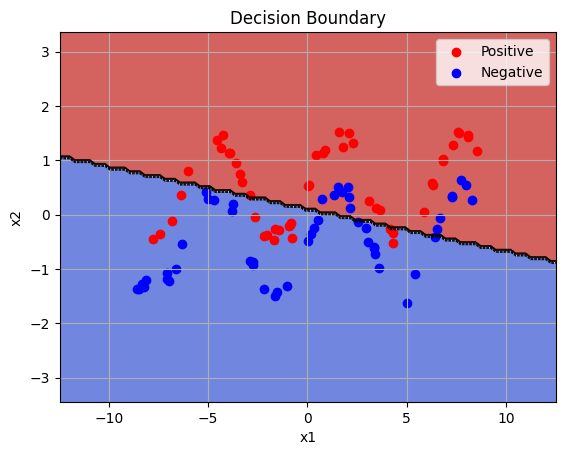

In [8]:
from vis_utils import visualize_2D_border

x1_intervals = (x_train[:, 0].min(), x_train[:, 0].max())
x2_intervals = (x_train[:, 1].min(), x_train[:, 1].max())

# expand 2.0 times
x1_mean = x1_intervals[0] + (x1_intervals[1] - x1_intervals[0]) / 2
x2_mean = x2_intervals[0] + (x2_intervals[1] - x2_intervals[0]) / 2

x1_intervals = (x1_mean - (x1_mean - x1_intervals[0]) * 2.0, x1_mean + (x1_intervals[1] - x1_mean) * 2.0)
x2_intervals = (x2_mean - (x2_mean - x2_intervals[0]) * 2.0, x2_mean + (x2_intervals[1] - x2_mean) * 2.0)

visualize_2D_border(svm, x1_intervals, x2_intervals, x_test, y_test)

接下来，清你自行编写代码，通过调整kernel类型、kernel参数、C值来提高模型的预测准确率。你可以仿照上述代码，来查看不同参数下的分类热力图、分类边界以及测试集数据点。

**请将训练准确率提升到99%以上，将测试集准确率提升到95%以上**

注意：每次修改参数后，需要重新初始化svm, optimizer 并调用optimizer.fit()来进行训练。

首先可以采用Polynomial kernel进行计算，在一定范围内以一定的步长穷举其参数

In [20]:
C_value = [1.6, 3.2, 6.4]
Degree_value = [8, 10, 12]
poly_c_value = [0.5, 1, 2]

train_pred_matrix = np.zeros((len(C_value), len(Degree_value), len(poly_c_value)))
test_pred_matrix = np.zeros((len(C_value), len(Degree_value), len(poly_c_value)))

for i, c in enumerate(C_value):
    for j, degree in enumerate(Degree_value):
        for k, poly_c in enumerate(poly_c_value):
        
            # initialize model
            kernel_fn = Polynomial_kernel(degree, poly_c)
            svm = SVM(kernel_fn=kernel_fn)
            max_passes = 1000
            optimizer = SSMO_optimizer(C = c)
            optimizer.fit(svm, x_train, y_train, max_passes=max_passes, verbose=False)

            # calculate accuracy
            _, y_train_pred = svm.predict(x_train)
            _, y_test_pred = svm.predict(x_test)

            train_pred_matrix[i][j][k] = (np.sum(y_train_pred == y_train)) / y_train.shape[0]
            test_pred_matrix[i][j][k] = (np.sum(y_test_pred == y_test)) / y_test.shape[0]

            print(c, degree, poly_c)
            print("train acc: {}, test acc: {}".format(train_pred_matrix[i][j][k], test_pred_matrix[i][j][k]))




Start training using SMO


1000it [00:09, 109.78it/s]


Training finished
1.6 8 0.5
train acc: 0.905, test acc: 0.77
Start training using SMO


1000it [00:08, 116.00it/s]


Training finished
1.6 8 1
train acc: 0.855, test acc: 0.73
Start training using SMO


1000it [00:06, 159.34it/s]


Training finished
1.6 8 2
train acc: 0.985, test acc: 0.82
Start training using SMO


1000it [00:09, 101.46it/s]


Training finished
1.6 10 0.5
train acc: 0.905, test acc: 0.76
Start training using SMO


1000it [00:08, 121.86it/s]


Training finished
1.6 10 1
train acc: 0.955, test acc: 0.78
Start training using SMO


1000it [00:06, 163.83it/s]


Training finished
1.6 10 2
train acc: 0.985, test acc: 0.87
Start training using SMO


1000it [00:09, 102.69it/s]


Training finished
1.6 12 0.5
train acc: 0.85, test acc: 0.7
Start training using SMO


1000it [00:08, 123.53it/s]


Training finished
1.6 12 1
train acc: 0.555, test acc: 0.5
Start training using SMO


1000it [00:05, 167.11it/s]


Training finished
1.6 12 2
train acc: 0.965, test acc: 0.85
Start training using SMO


1000it [00:09, 108.41it/s]


Training finished
3.2 8 0.5
train acc: 0.8, test acc: 0.8
Start training using SMO


1000it [00:08, 115.04it/s]


Training finished
3.2 8 1
train acc: 0.92, test acc: 0.74
Start training using SMO


1000it [00:06, 159.39it/s]


Training finished
3.2 8 2
train acc: 0.98, test acc: 0.82
Start training using SMO


1000it [00:09, 103.41it/s]


Training finished
3.2 10 0.5
train acc: 0.9, test acc: 0.74
Start training using SMO


1000it [00:08, 122.68it/s]


Training finished
3.2 10 1
train acc: 0.745, test acc: 0.6
Start training using SMO


1000it [00:06, 161.08it/s]


Training finished
3.2 10 2
train acc: 0.925, test acc: 0.82
Start training using SMO


1000it [00:10, 98.30it/s]


Training finished
3.2 12 0.5
train acc: 0.555, test acc: 0.5
Start training using SMO


1000it [00:07, 126.68it/s]


Training finished
3.2 12 1
train acc: 0.975, test acc: 0.82
Start training using SMO


1000it [00:06, 162.55it/s]


Training finished
3.2 12 2
train acc: 0.99, test acc: 0.87
Start training using SMO


1000it [00:09, 110.17it/s]


Training finished
6.4 8 0.5
train acc: 0.745, test acc: 0.71
Start training using SMO


1000it [00:08, 115.01it/s]


Training finished
6.4 8 1
train acc: 0.87, test acc: 0.71
Start training using SMO


1000it [00:06, 164.74it/s]


Training finished
6.4 8 2
train acc: 0.99, test acc: 0.83
Start training using SMO


1000it [00:09, 107.54it/s]


Training finished
6.4 10 0.5
train acc: 0.61, test acc: 0.6
Start training using SMO


1000it [00:08, 121.73it/s]


Training finished
6.4 10 1
train acc: 0.81, test acc: 0.71
Start training using SMO


1000it [00:05, 167.06it/s]


Training finished
6.4 10 2
train acc: 0.99, test acc: 0.87
Start training using SMO


1000it [00:09, 105.57it/s]


Training finished
6.4 12 0.5
train acc: 0.92, test acc: 0.81
Start training using SMO


1000it [00:08, 123.55it/s]


Training finished
6.4 12 1
train acc: 0.955, test acc: 0.81
Start training using SMO


1000it [00:06, 165.78it/s]

Training finished
6.4 12 2
train acc: 0.99, test acc: 0.87


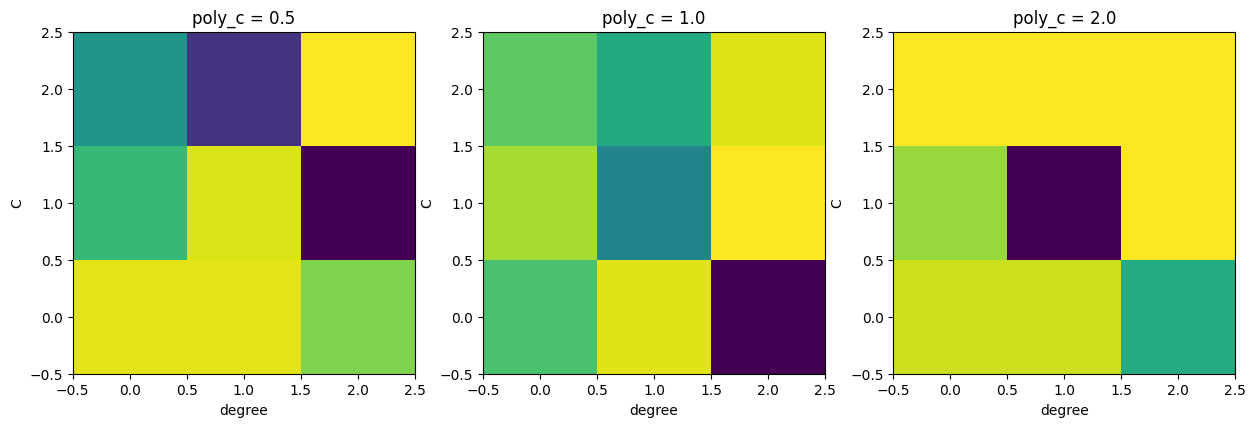

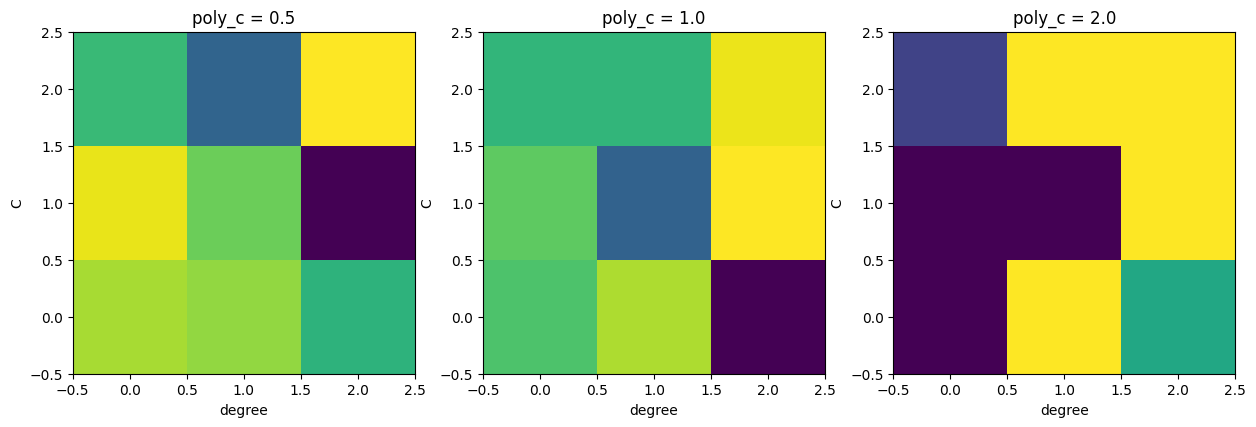

In [21]:
fig, axes1 = plt.subplots(1, train_pred_matrix.shape[2], figsize=(15, 5))

for i in range(train_pred_matrix.shape[2]):
    axes1[i].imshow(train_pred_matrix[:, :, i], cmap='viridis',origin='lower')
    axes1[i].set_title(f'poly_c = {(2**i)/2}')
    axes1[i].set_xlabel('degree')
    axes1[i].set_ylabel('C')

fig, axes2 = plt.subplots(1, test_pred_matrix.shape[2], figsize=(15, 5))

for i in range(test_pred_matrix.shape[2]):
    axes2[i].imshow(test_pred_matrix[:, :, i], cmap='viridis', origin='lower')
    axes2[i].set_title(f'poly_c = {(2**i)/2}')
    axes2[i].set_xlabel('degree')
    axes2[i].set_ylabel('C')

plt.show()



可以看出此时准确率比较高的参数是$C=6.4 \ \ degree=12 \ \ poly\_c=2$

Start training using SMO


loss: -0.0001: : 1000it [00:12, 80.59it/s]


Training finished


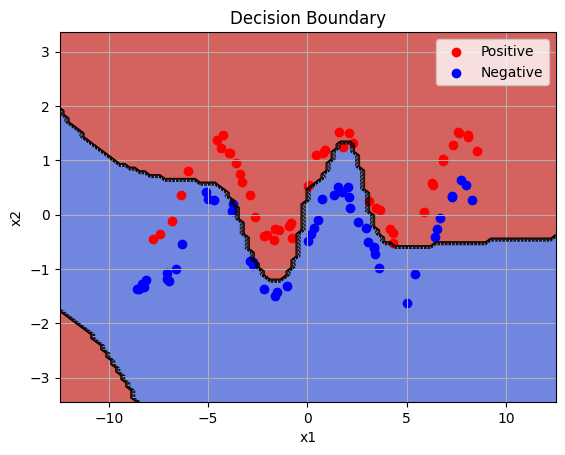

train accuracy is 0.99
test accuracy is 0.87


In [26]:
kernel_fn = Polynomial_kernel(12, 2)
svm = SVM(kernel_fn=kernel_fn)
max_passes = 1000
optimizer = SSMO_optimizer(C = 6.4)
optimizer.fit(svm, x_train, y_train, max_passes=max_passes, verbose=True)

from vis_utils import visualize_2D_border

x1_intervals = (x_train[:, 0].min(), x_train[:, 0].max())
x2_intervals = (x_train[:, 1].min(), x_train[:, 1].max())

# expand 2.0 times
x1_mean = x1_intervals[0] + (x1_intervals[1] - x1_intervals[0]) / 2
x2_mean = x2_intervals[0] + (x2_intervals[1] - x2_intervals[0]) / 2

x1_intervals = (x1_mean - (x1_mean - x1_intervals[0]) * 2.0, x1_mean + (x1_intervals[1] - x1_mean) * 2.0)
x2_intervals = (x2_mean - (x2_mean - x2_intervals[0]) * 2.0, x2_mean + (x2_intervals[1] - x2_mean) * 2.0)

visualize_2D_border(svm, x1_intervals, x2_intervals, x_test, y_test)

_, y_train_pred = svm.predict(x_train)
_, y_test_pred = svm.predict(x_test)

train_acc = (np.sum(y_train_pred == y_train)) / y_train.shape[0]
test_acc = (np.sum(y_test_pred == y_test)) / y_test.shape[0]

print("train accuracy is {}".format(train_acc))
print("test accuracy is {}".format(test_acc))

Polynomial kernel的参数较多，调试较困难且效果一般，因此采用RBF kernel，对一定范围内的$C$和$\sigma$进行穷举：

In [9]:
C_value = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]
Sigma_value = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]

train_pred_matrix = np.zeros((len(C_value), len(Sigma_value)))
test_pred_matrix = np.zeros((len(C_value), len(Sigma_value)))

for i, c in enumerate(C_value):
    for j, sigma in enumerate(Sigma_value):
        
        # initialize model
        kernel_fn = RBF_kernel(sigma)
        svm = SVM(kernel_fn=kernel_fn)
        max_passes = 1000
        optimizer = SSMO_optimizer(C = c)
        optimizer.fit(svm, x_train, y_train, max_passes=max_passes, verbose=True)

        # calculate accuracy
        _, y_train_pred = svm.predict(x_train)
        _, y_test_pred = svm.predict(x_test)

        train_pred_matrix[i][j] = (np.sum(y_train_pred == y_train)) / y_train.shape[0]
        test_pred_matrix[i][j] = (np.sum(y_test_pred == y_test)) / y_test.shape[0]

        print(c, sigma)
        print("train acc: {}, test acc: {}".format(train_pred_matrix[i][j], test_pred_matrix[i][j]))




Start training using SMO


loss: -17.9482: : 645it [00:08, 79.06it/s]


Training finished
0.1 0.1
train acc: 0.5, test acc: 0.5
Start training using SMO


loss: -16.1846: : 366it [00:04, 87.02it/s] 


Training finished
0.1 0.2
train acc: 1.0, test acc: 0.85
Start training using SMO


loss: -13.4681: : 392it [00:04, 93.91it/s] 


Training finished
0.1 0.4
train acc: 1.0, test acc: 0.86
Start training using SMO


loss: -13.3217: : 686it [00:06, 98.53it/s] 


Training finished
0.1 0.8
train acc: 0.99, test acc: 0.85
Start training using SMO


loss: -15.5543: : 659it [00:07, 86.49it/s] 


Training finished
0.1 1.6
train acc: 0.77, test acc: 0.71
Start training using SMO


loss: -17.1449: : 245it [00:02, 86.54it/s] 


Training finished
0.1 3.2
train acc: 0.71, test acc: 0.65
Start training using SMO


loss: -18.5969: : 252it [00:02, 91.44it/s] 


Training finished
0.1 6.4
train acc: 0.68, test acc: 0.6
Start training using SMO


loss: -31.7928: : 283it [00:03, 75.15it/s]


Training finished
0.2 0.1
train acc: 1.0, test acc: 0.68
Start training using SMO


loss: -25.1048: : 445it [00:05, 80.27it/s] 


Training finished
0.2 0.2
train acc: 1.0, test acc: 0.85
Start training using SMO


loss: -17.6680: : 265it [00:04, 62.93it/s]


Training finished
0.2 0.4
train acc: 1.0, test acc: 0.84
Start training using SMO


loss: -18.5697: : 301it [00:03, 79.74it/s] 


Training finished
0.2 0.8
train acc: 0.995, test acc: 0.88
Start training using SMO


loss: -25.0374: : 565it [00:06, 89.16it/s] 


Training finished
0.2 1.6
train acc: 0.945, test acc: 0.85
Start training using SMO


loss: -30.5647: : 303it [00:03, 88.26it/s] 


Training finished
0.2 3.2
train acc: 0.675, test acc: 0.69
Start training using SMO


loss: -34.6962: : 334it [00:03, 100.91it/s]


Training finished
0.2 6.4
train acc: 0.7, test acc: 0.61
Start training using SMO


loss: -48.2905: : 308it [00:04, 69.31it/s]


Training finished
0.4 0.1
train acc: 1.0, test acc: 0.8
Start training using SMO


loss: -31.0586: : 147it [00:02, 49.31it/s]


Training finished
0.4 0.2
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -19.8740: : 181it [00:03, 49.33it/s]


Training finished
0.4 0.4
train acc: 1.0, test acc: 0.87
Start training using SMO


loss: -23.0062: : 430it [00:05, 82.61it/s] 


Training finished
0.4 0.8
train acc: 1.0, test acc: 0.88
Start training using SMO


loss: -34.9883: : 601it [00:07, 82.99it/s] 


Training finished
0.4 1.6
train acc: 1.0, test acc: 0.88
Start training using SMO


loss: -53.8872: : 378it [00:04, 87.14it/s] 


Training finished
0.4 3.2
train acc: 0.795, test acc: 0.67
Start training using SMO


loss: -62.9246: : 492it [00:05, 96.74it/s] 


Training finished
0.4 6.4
train acc: 0.635, test acc: 0.7
Start training using SMO


loss: -57.6629: : 197it [00:04, 44.87it/s]


Training finished
0.8 0.1
train acc: 1.0, test acc: 0.81
Start training using SMO


loss: -32.8008: : 334it [00:06, 55.38it/s]


Training finished
0.8 0.2
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -21.2475: : 396it [00:07, 56.27it/s]


Training finished
0.8 0.4
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -27.1903: : 518it [00:06, 75.53it/s] 


Training finished
0.8 0.8
train acc: 1.0, test acc: 0.86
Start training using SMO


loss: -44.7995: : 649it [00:07, 83.31it/s] 


Training finished
0.8 1.6
train acc: 1.0, test acc: 0.94
Start training using SMO


loss: -93.2518: : 325it [00:03, 83.78it/s] 


Training finished
0.8 3.2
train acc: 0.845, test acc: 0.74
Start training using SMO


loss: -113.1726: : 638it [00:06, 95.15it/s] 


Training finished
0.8 6.4
train acc: 0.665, test acc: 0.65
Start training using SMO


loss: -58.0452: : 154it [00:03, 42.58it/s]


Training finished
1.6 0.1
train acc: 1.0, test acc: 0.82
Start training using SMO


loss: -32.8238: : 140it [00:03, 40.35it/s]


Training finished
1.6 0.2
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -21.9181: : 161it [00:03, 43.56it/s]


Training finished
1.6 0.4
train acc: 1.0, test acc: 0.91
Start training using SMO


loss: -31.0959: : 764it [00:09, 80.17it/s] 


Training finished
1.6 0.8
train acc: 1.0, test acc: 0.95
Start training using SMO


loss: -54.3600: : 1000it [00:12, 81.20it/s] 


Training finished
1.6 1.6
train acc: 1.0, test acc: 0.98
Start training using SMO


loss: -159.6586: : 985it [00:10, 95.36it/s] 


Training finished
1.6 3.2
train acc: 0.905, test acc: 0.8
Start training using SMO


loss: -208.3066: : 713it [00:07, 91.79it/s] 


Training finished
1.6 6.4
train acc: 0.71, test acc: 0.64
Start training using SMO


loss: -58.0452: : 56it [00:02, 27.05it/s]


Training finished
3.2 0.1
train acc: 1.0, test acc: 0.82
Start training using SMO


loss: -32.8237: : 173it [00:03, 47.38it/s]


Training finished
3.2 0.2
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -21.9196: : 268it [00:05, 51.65it/s]


Training finished
3.2 0.4
train acc: 1.0, test acc: 0.91
Start training using SMO


loss: -33.7655: : 708it [00:10, 68.95it/s] 


Training finished
3.2 0.8
train acc: 1.0, test acc: 0.95
Start training using SMO


loss: -64.4794: : 912it [00:10, 83.52it/s] 


Training finished
3.2 1.6
train acc: 1.0, test acc: 0.97
Start training using SMO


loss: -258.2514: : 727it [00:08, 89.44it/s] 


Training finished
3.2 3.2
train acc: 0.96, test acc: 0.84
Start training using SMO


loss: -387.6023: : 1000it [00:10, 96.02it/s]


Training finished
3.2 6.4
train acc: 0.745, test acc: 0.66
Start training using SMO


loss: -58.0452: : 62it [00:02, 26.64it/s]


Training finished
6.4 0.1
train acc: 1.0, test acc: 0.82
Start training using SMO


loss: -32.8238: : 135it [00:03, 37.42it/s]


Training finished
6.4 0.2
train acc: 1.0, test acc: 0.89
Start training using SMO


loss: -21.9196: : 273it [00:05, 53.09it/s]


Training finished
6.4 0.4
train acc: 1.0, test acc: 0.91
Start training using SMO


loss: -34.6781: : 791it [00:10, 75.74it/s] 


Training finished
6.4 0.8
train acc: 1.0, test acc: 0.99
Start training using SMO


loss: -73.5768: : 1000it [00:13, 76.82it/s]


Training finished
6.4 1.6
train acc: 1.0, test acc: 0.94
Start training using SMO


loss: -371.3485: : 1000it [00:12, 80.07it/s]


Training finished
6.4 3.2
train acc: 1.0, test acc: 0.92
Start training using SMO


loss: -726.2337: : 1000it [00:10, 94.18it/s]

Training finished
6.4 6.4
train acc: 0.76, test acc: 0.68


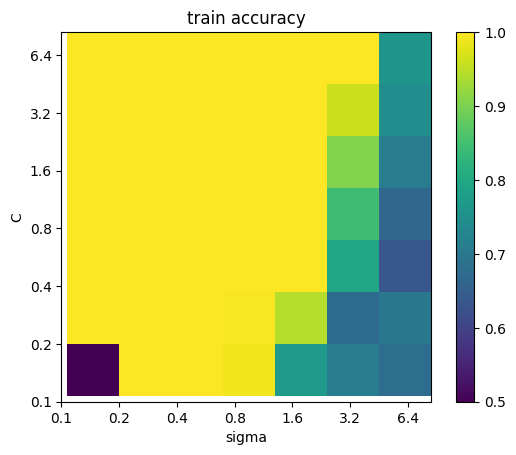

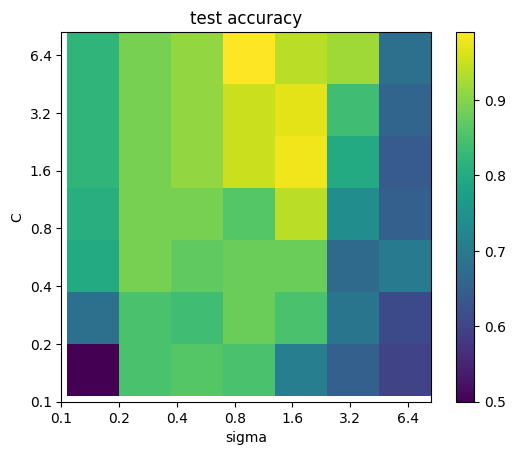

In [10]:
plt.imshow(train_pred_matrix, cmap = 'viridis', origin = 'lower', extent = [min(Sigma_value), max(Sigma_value), min(C_value), max(C_value)])
plt.xlabel('sigma')
plt.ylabel('C')
plt.title("train accuracy")
plt.xticks(np.arange(len(Sigma_value)),Sigma_value)
plt.yticks(np.arange(len(C_value)),C_value)
plt.colorbar()
plt.show()

plt.imshow(test_pred_matrix, cmap = 'viridis', origin = 'lower', extent = [min(Sigma_value), max(Sigma_value), min(C_value), max(C_value)])
plt.xlabel('sigma')
plt.ylabel('C')
plt.title("test accuracy")
plt.xticks(np.arange(len(Sigma_value)),Sigma_value)
plt.yticks(np.arange(len(C_value)),C_value)
plt.colorbar()
plt.show()

可以看出准确率比较高的组合是$C=6.4$, $\sigma=0.8$

Start training using SMO


loss: -34.6782: : 710it [00:10, 68.21it/s] 


Training finished


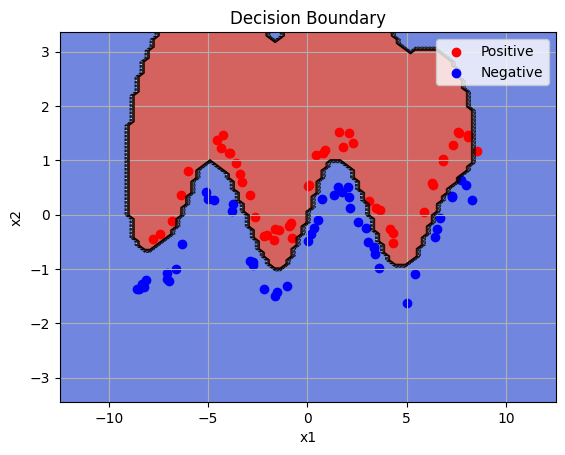

train accuracy is 1.0
test accuracy is 0.99


In [11]:
kernel_fn = RBF_kernel(0.8)
svm = SVM(kernel_fn=kernel_fn)
max_passes = 1000
optimizer = SSMO_optimizer(C = 6.4)
optimizer.fit(svm, x_train, y_train, max_passes=max_passes, verbose=True)

from vis_utils import visualize_2D_border

x1_intervals = (x_train[:, 0].min(), x_train[:, 0].max())
x2_intervals = (x_train[:, 1].min(), x_train[:, 1].max())

# expand 2.0 times
x1_mean = x1_intervals[0] + (x1_intervals[1] - x1_intervals[0]) / 2
x2_mean = x2_intervals[0] + (x2_intervals[1] - x2_intervals[0]) / 2

x1_intervals = (x1_mean - (x1_mean - x1_intervals[0]) * 2.0, x1_mean + (x1_intervals[1] - x1_mean) * 2.0)
x2_intervals = (x2_mean - (x2_mean - x2_intervals[0]) * 2.0, x2_mean + (x2_intervals[1] - x2_mean) * 2.0)

visualize_2D_border(svm, x1_intervals, x2_intervals, x_test, y_test)

_, y_train_pred = svm.predict(x_train)
_, y_test_pred = svm.predict(x_test)

train_acc = (np.sum(y_train_pred == y_train)) / y_train.shape[0]
test_acc = (np.sum(y_test_pred == y_test)) / y_test.shape[0]

print("train accuracy is {}".format(train_acc))
print("test accuracy is {}".format(test_acc))
